# Using the World Coordinate System (WCS)<img src='images/logo.png' width="300" height="300" align='right'>

So now you have some understanding of astronomical coordinates, and you know some basics about the Flexible Image Transport System (FITS). However, we have not looked closely at how the location on the sky is encoded into the FITS image and how to utilize this information for your benefit. 

The most important transformation that you will want to do is to map a sky coordinate to a pixel coordinate on your image, or vice-versa. For instance, if I gave you the RA and Dec coordinates of a star, you will want to be able to identify which x and y pixel coordinates that sky coordinate corresponds to in your image. This tutorial will focus on that precise task. In the end you will be identifying which star is Tabby's Star in an image provided for you.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

## astropy.wcs
Implements the FITS WCS standard and some commonly used distortion conventions.

This tutorial will show how to create a WCS object from a FITS file and how to use it to transform coordinates.

In [2]:
from astropy.io import fits
from astropy import wcs

Open a file with `astropy.fits` and look at it.

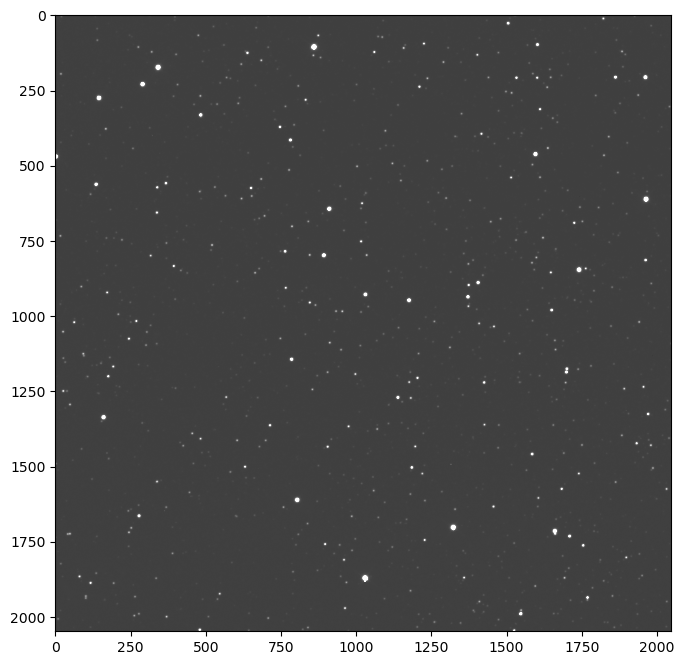

In [3]:
image,header = fits.getdata('data/TabbysStar.fits',header=True)
plt.figure(figsize=(8,8))
plt.imshow(image,vmin=np.median(image)-1*np.std(image),vmax=np.median(image)+3*np.std(image),cmap='gray')

To create a WCS object pass the header with the WCS keywords to astropy.wcs.WCS (Primary header in this case).

In [4]:
w = wcs.WCS(header)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [5]:
header

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -32 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                 2048                                                  
NAXIS2  =                 2048                                                  
DATE-OBS= '2017-06-05T10:08:49' / [ISO 8601] UTC date/time of exposure start    
EXPTIME =   6.00000000000E+001 / [sec] Duration of exposure                     
EXPOSURE=   6.00000000000E+001 / [sec] Duration of exposure                     
SET-TEMP=  -30.000000000000000 /CCD temperature setpoint in C                   
CCD-TEMP=  -29.274000167846680 /CCD temperature at start of exposure in C       
XPIXSZ  =   13.500000000000000 /Pixel Width in microns (after binning)          
YPIXSZ  =   13.500000000000000 /Pixel Height in microns (after binning)         
XBINNING=                   

To perform the transformation from detector to sky, including distortions, pass x and y and an 'origin'. The third argument, 'origin', indicates whether the coordinates are 1-based (like FITS), or 0-based (like python).

In [6]:
ra, dec = w.all_pix2world([1, 1], [2, 2], 1)
print(ra, dec)

[301.3254672 301.3254672] [44.29627131 44.29627131]


Perfom the inverse transformation - from sky to detector coordinates.

If analytical inverse is not available (often the case in the presence of distortion), then an iterative inverse is performed.

In [7]:
print(w.all_world2pix(ra, dec, 1))

[array([1., 1.]), array([2., 2.])]


The WCS object can be changed and the new WCS can be written out as a new header.

By default only the primary WCS keywords are written out to the header. Pass a keyword `relax=True` to write out the distortion.

In [8]:
# The original WCS
w.printwcs()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 301.561857685  44.4727560971  
CRPIX : 1024.0  1024.0  
CD1_1 CD1_2  : 0.000168923637342  -3.53632572831e-06  
CD2_1 CD2_2  : 3.53666118452e-06  0.000168907614749  
NAXIS : 2048  2048


In [9]:
w.wcs.crpix = [200, 200]
w.to_header(relax=True)
w.printwcs()

WCS Keywords

Number of WCS axes: 2
CTYPE : 'RA---TAN'  'DEC--TAN'  
CRVAL : 301.561857685  44.4727560971  
CRPIX : 200.0  200.0  
CD1_1 CD1_2  : 0.000168923637342  -3.53632572831e-06  
CD2_1 CD2_2  : 3.53666118452e-06  0.000168907614749  
NAXIS : 2048  2048


# Exercise:
Here we are going to identify which star in the image is actually Tabby's Star. The steps will be as follows:
1. Re-read the data file for Tabby's Star (since we've altered the information). 
2. Look up the coordinates of Tabby's Star. You can find this pretty easily, though it might help to use its astronomical name: KIC 8462852
3. Create a SkyCoord object from the RA and Dec
4. Create a WCS object from the header
5. Use the world2pix method to convert the RA and Dec values into pixel coordinates
6. Plot the image overlayed with a plot symbol (crosshair, circle, or whatever) indicating which star is Tabby's Star.

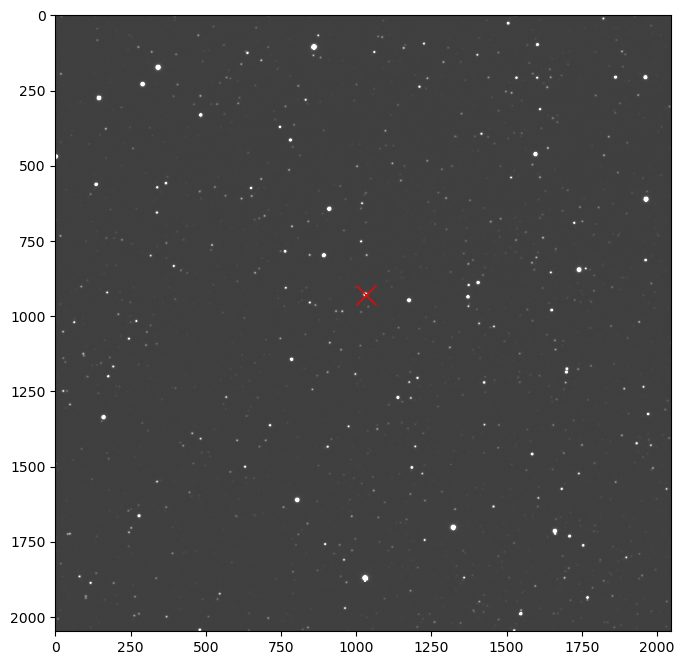

In [12]:
from astropy.coordinates import SkyCoord
import astropy.units as u

image, header = fits.getdata('data/TabbysStar.fits', header=True)
wcsObj = wcs.WCS(header)
ra = header["RA"] 
dec = header["DEC"]

tabby_coord = SkyCoord(ra, dec , unit=(u.hourangle, u.deg))

#Get the pixel coordinates from world2pix 
xpix, ypix = wcsObj.all_world2pix(tabby_coord.ra.deg, tabby_coord.dec.deg, 1)

#Put an x on the image at the pixel coordinates
plt.figure(figsize=(8,8))
plt.imshow(image,vmin=np.median(image)-1*np.std(image),vmax=np.median(image)+3*np.std(image),cmap='gray')
plt.plot(xpix, ypix, 'x', markersize=15, markeredgecolor='red', markerfacecolor='none')